In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence

/Users/joshsmith/Git/NovoNordisk_Capstone/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read original data from 
data = pd.read_csv('../../dataframes/DF_prest.csv', index_col=0)

# setup 'docs' for use with Tokenizer
def nt_seq_doc(nt_sequence):
    if 'GACAAGCTTGCGGCCGCA' not in nt_sequence:
        return None
    true_nt = nt_sequence.split('GACAAGCTTGCGGCCGCA')[1]
    if len(true_nt) % 3 != 0:
        return None
    return ' '.join([true_nt[i:i+3] 
                     for i in range(0, len(true_nt), 3)])
# split quantiles
def assign_class(conc):
    if conc <= low_cut:
        return 0
    elif conc >= high_cut:
        return 1
    return

data['nt_seq_doc'] = data['nt_seq'].apply(nt_seq_doc)
data = data[pd.notnull(data['nt_seq_doc'])]

# identify high and low classes by conc_cf quantiles
low_cut = data['conc_cf'].quantile(0.25)
high_cut = data['conc_cf'].quantile(0.75)

data['class'] = data['conc_cf'].apply(assign_class)
data = data[pd.notnull(data['class'])]
# check shape
print('data shape: ', data.shape)

data shape:  (22364, 8)


In [3]:
# define sequence documents
docs = list(data['nt_seq_doc'])
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

# integer encode documents
X = t.texts_to_sequences(docs)
y = data['class'].values
max_seq_length = 200
X = sequence.pad_sequences(X, maxlen=max_seq_length)

# create test-train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# fix random seed for reproducibility
np.random.seed(42)

# load the dataset but only keep the top n words, zero the rest
top_words = len(t.word_index) + 1

# Embed codons, learn w/ single Long Short Term Memory Layer

### 4 dimensional embedding

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 4
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 181, 4)            260       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 42,361
Trainable params: 42,361
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
15654/15654 [==============================] - 27s 2ms/step - loss: 0.6922 - acc: 0.5111
Epoch 2/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6795 - acc: 0.5687
Epoch 3/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6559 - acc: 0.6158
Accuracy: 58.12%


### 8 dimensional embedding

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 181, 8)            520       
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               43600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 44,221
Trainable params: 44,221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6946 - acc: 0.5074
Epoch 2/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6772 - acc: 0.5687
Epoch 3/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6601 - acc: 0.6120
Accuracy: 61.67%


### 16 dimensional embedding

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           1040      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 47,941
Trainable params: 47,941
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
15654/15654 [==============================] - 30s 2ms/step - loss: 0.6871 - acc: 0.5325
Epoch 2/3
15654/15654 [==============================] - 29s 2ms/step - loss: 0.6558 - acc: 0.6138
Epoch 3/3
15654/15654 [==============================] - 29s 2ms/step - loss: 0.6476 - acc: 0.6335
Accuracy: 63.16%


### 32 dimensional embedding

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 181, 32)           2080      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 55,381
Trainable params: 55,381
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
15654/15654 [==============================] - 28s 2ms/step - loss: 0.6887 - acc: 0.5305
Epoch 2/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6515 - acc: 0.6242
Epoch 3/3
15654/15654 [==============================] - 26s 2ms/step - loss: 0.6417 - acc: 0.6379
Accuracy: 61.74%


# Hook LSTM to basic CNN

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 15654 samples, validate on 6710 samples
Epoch 1/15
15654/15654 [==============================] - 36s 2ms/step - loss: 0.6663 - acc: 0.5795 - val_loss: 0.6546 - val_acc: 0.6185
Epoch 2/15
15654/15654 [==============================] - 35s 2ms/step - loss: 0.6438 - acc: 0.6283 - val_loss: 0.6392 - val_acc: 0.6380
Epoch 3/15
15654/15654 [==============================] - 34s 2ms/step - loss: 0.6331 - acc: 0.6430 - val_loss: 0.6310 - val_acc: 0.6453
Epoch 4/15
15654/15654 [==============================] - 34s 2ms/step - loss: 0.6245 - acc: 0.6587 - val_loss: 0.6362 - val_acc: 0.6262
Epoch 5/15
15654/15654 [==============================] - 33s 2ms/step - loss: 0.6154 - acc: 0.6678 - val_loss: 0.6283 - val_acc: 0.6426
Epoch 6/15
15654/15654 [==============================] - 33s 2ms/step - loss: 0.6113 - acc: 0.6669 - val_loss: 0.6171 - val_acc: 0.6563
Epoch 7/15
15654/15654 [======================

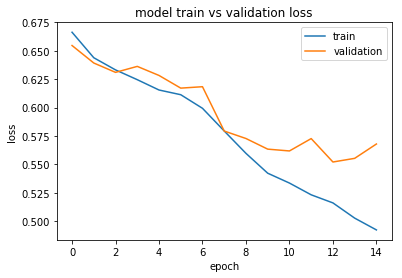

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='selu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# record training progress
history = model.fit(X_train, y_train, epochs=15, batch_size=64,
                    validation_data=(X_test, y_test))

# plot loss vs. epoch
# https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [31]:
# do PCA and/or t-SNE with embedding weights
# dictionaries here to add amino acid type/polarity 
# to color markers in the tSNE plots
codon_to_aa = {
    'aaa': 'k', 'aat': 'n', 'aac': 'n', 'aag': 'k',
    'ata': 'i', 'att': 'i', 'atc': 'i', 'atg': 'm', 
    'aca': 't', 'act': 't', 'acc': 't', 'acg': 't', 
    'aga': 'r', 'agt': 's', 'agc': 's', 'agg': 'r', 
    'taa': 'stop', 'tat': 'y', 'tac': 'y', 'tag': 'stop', 
    'tta': 'l', 'ttt': 'f', 'ttc': 'f', 'ttg': 'l', 
    'tca': 's', 'tct': 's', 'tcc': 's', 'tcg': 's', 
    'tga': 'stop', 'tgt': 'c', 'tgc': 'c', 'tgg': 'w', 
    'caa': 'q', 'cat': 'h', 'cac': 'h', 'cag': 'q', 
    'cta': 'l', 'ctt': 'l', 'ctc': 'l', 'ctg': 'l', 
    'cca': 'p', 'cct': 'p', 'ccc': 'p', 'ccg': 'p', 
    'cga': 'r', 'cgt': 'r', 'cgc': 'r', 'cgg': 'r', 
    'gaa': 'e', 'gat': 'd', 'gac': 'd', 'gag': 'e', 
    'gta': 'v', 'gtt': 'v', 'gtc': 'v', 'gtg': 'v', 
    'gca': 'a', 'gct': 'a', 'gcc': 'a', 'gcg': 'a', 
    'gga': 'g', 'ggt': 'g', 'ggc': 'g', 'ggg': 'g',
    'zero': 'zero'
}

aa_properties = {
    'i': {'hydropathy': 4.5, 'type': 0, 'code': 0},
    'v': {'hydropathy': 4.2, 'type': 0, 'code': 1},
    'l': {'hydropathy': 3.8, 'type': 0, 'code': 2},
    'f': {'hydropathy': 2.8, 'type': 1, 'code': 3},
    'c': {'hydropathy': 2.5, 'type': 0, 'code': 4},
    'm': {'hydropathy': 1.9, 'type': 0, 'code': 5},
    'a': {'hydropathy': 1.8, 'type': 0, 'code': 6},
    'g': {'hydropathy': -0.4, 'type': 2, 'code': 7},
    't': {'hydropathy': -0.7, 'type': 2, 'code': 8},
    's': {'hydropathy': -0.8, 'type': 2, 'code': 9},
    'w': {'hydropathy': -0.9, 'type': 1, 'code': 10},
    'y': {'hydropathy': -1.3, 'type': 1, 'code': 11},
    'p': {'hydropathy': -1.6, 'type': 2, 'code': 12},
    'h': {'hydropathy': -3.2, 'type': 2, 'code': 13},
    'e': {'hydropathy': -3.5, 'type': 3, 'code': 14},
    'q': {'hydropathy': -3.5, 'type': 2, 'code': 15},
    'd': {'hydropathy': -3.5, 'type': 3, 'code': 16},
    'n': {'hydropathy': -3.5, 'type': 2, 'code': 17},
    'k': {'hydropathy': -3.9, 'type': 4, 'code': 18},
    'r': {'hydropathy': -4.5, 'type': 4, 'code': 19},
    'stop': {'hydropathy': 5, 'type': 5, 'code': 20},
    'zero': {'hydropathy': 5, 'type': 6, 'code': 21},
}

In [32]:
embedding_weights = model.layers[0].get_weights()[0]
t.word_index['zero'] = 0  # account for zero being added

In [33]:
from sklearn.manifold import TSNE
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

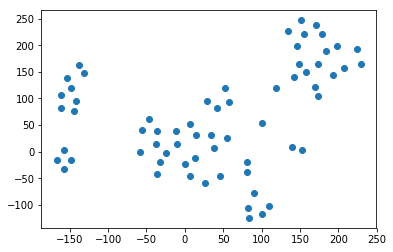

In [34]:
X_embedded = TSNE(n_components=2, n_iter=5000, n_iter_without_progress=5000,
                  perplexity=10).fit_transform(embedding_weights)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [66]:
df = pd.DataFrame(X_embedded)
for key, value in t.word_index.items():
    df.loc[value, 'codon'] = key
    df.loc[value, 'aa'] = codon_to_aa[key]
    df.loc[value, 'hydropathy'] = aa_properties[codon_to_aa[key]]['hydropathy']
    df.loc[value, 'type'] = aa_properties[codon_to_aa[key]]['type']
    df.loc[value, 'code'] = aa_properties[codon_to_aa[key]]['code']
df

,0,1,codon,aa,hydropathy,type,code
0,34.384403,30.557791,zero,zero,5.0,6.0,21.0
1,109.584045,-102.919792,gag,e,-3.5,3.0,14.0
2,170.562927,237.955444,ctg,l,3.8,0.0,2.0
3,38.451595,7.517574,cag,q,-3.5,2.0,15.0
4,-58.743904,0.218989,ggc,g,-0.4,2.0,7.0
5,-148.375732,-16.394371,ccc,p,-1.6,2.0,12.0
6,-161.469742,81.679283,aag,k,-3.9,4.0,18.0
7,83.656189,-124.556374,gaa,e,-3.5,3.0,14.0
8,54.616222,24.829142,cac,h,-3.2,2.0,13.0
9,169.343399,122.269424,gtg,v,4.2,0.0,1.0


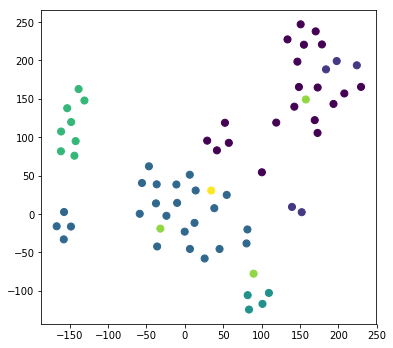

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(df.loc[:, 0], df.loc[:, 1], c=df.loc[:,'type'], s=50,)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

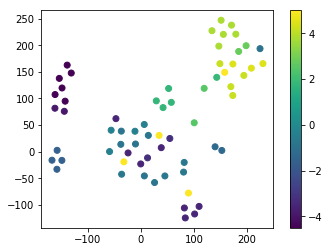

In [59]:
plt.scatter(df.loc[:, 0], df.loc[:, 1], c=df.loc[:,'hydropathy'])
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('hydropathy.png', dpi=300)

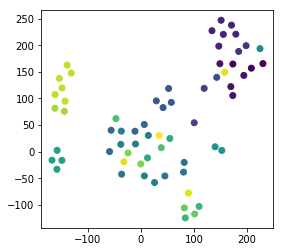

In [55]:
plt.scatter(df.loc[:, 0], df.loc[:, 1], c=df.loc[:,'code'])
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [68]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = df.loc[:, 0],
    y = df.loc[:, 1],
    name = 'codons',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    ),
    text=df['aa']
)

data = [trace0]

layout = dict(title = 'codon embedding',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

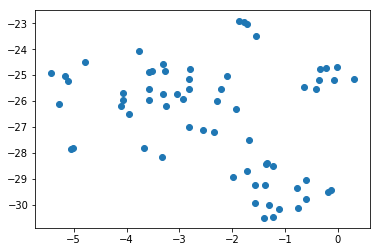

In [48]:
X_embedded = TSNE(n_components=2, n_iter=5000, n_iter_without_progress=5000,
                  perplexity=30).fit_transform(embedding_weights)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

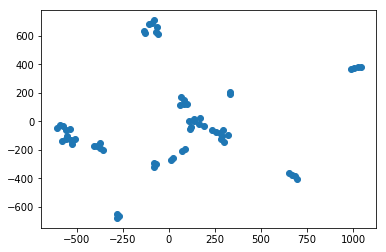

In [58]:
X_embedded = TSNE(n_components=2, n_iter=5000, n_iter_without_progress=5000,
                  perplexity=2).fit_transform(embedding_weights)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

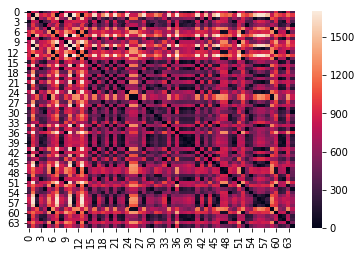

In [73]:
tSNE_dist = distance_matrix(X_embedded, X_embedded)
sns.heatmap(tSNE_dist)

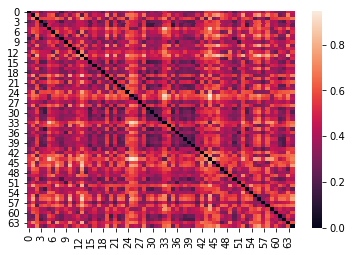

In [60]:
embedding_dist = distance_matrix(embedding_weights, embedding_weights)
sns.heatmap(embedding_dist)

In [90]:
test = np.in1d(-embedding_dist[20], 
               np.sort(-embedding_dist[20])[:3])
test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [91]:
for key, value in t.word_index.items():
    if test[value]:
        print(key)

cct
ata
cta


In [79]:
t.word_index

{'gag': 1,
 'ctg': 2,
 'cag': 3,
 'ggc': 4,
 'ccc': 5,
 'aag': 6,
 'gaa': 7,
 'cac': 8,
 'gtg': 9,
 'gac': 10,
 'gcc': 11,
 'aaa': 12,
 'gat': 13,
 'cgc': 14,
 'agc': 15,
 'atg': 16,
 'aac': 17,
 'gcg': 18,
 'ttc': 19,
 'acc': 20,
 'atc': 21,
 'tcc': 22,
 'aat': 23,
 'ctc': 24,
 'cct': 25,
 'cca': 26,
 'gct': 27,
 'ttt': 28,
 'tct': 29,
 'gga': 30,
 'gca': 31,
 'aca': 32,
 'tac': 33,
 'att': 34,
 'ggg': 35,
 'gtc': 36,
 'caa': 37,
 'act': 38,
 'agt': 39,
 'tca': 40,
 'tga': 41,
 'taa': 42,
 'ttg': 43,
 'tat': 44,
 'ctt': 45,
 'tgg': 46,
 'aga': 47,
 'agg': 48,
 'tgc': 49,
 'cat': 50,
 'gtt': 51,
 'cgg': 52,
 'ggt': 53,
 'tgt': 54,
 'tta': 55,
 'ata': 56,
 'gta': 57,
 'cta': 58,
 'ccg': 59,
 'cga': 60,
 'acg': 61,
 'tcg': 62,
 'cgt': 63,
 'tag': 64,
 'zero': 0}

In [11]:
# Dense instead of lstm overfits dramatically

Train on 15654 samples, validate on 6710 samples
Epoch 1/10
15654/15654 [==============================] - 13s 830us/step - loss: 0.6679 - acc: 0.5903 - val_loss: 0.6444 - val_acc: 0.6311
Epoch 2/10
15654/15654 [==============================] - 13s 808us/step - loss: 0.6322 - acc: 0.6455 - val_loss: 0.6472 - val_acc: 0.6338
Epoch 3/10
15654/15654 [==============================] - 12s 798us/step - loss: 0.6194 - acc: 0.6602 - val_loss: 0.6429 - val_acc: 0.6347
Epoch 4/10
15654/15654 [==============================] - 13s 803us/step - loss: 0.6056 - acc: 0.6754 - val_loss: 0.6481 - val_acc: 0.6313
Epoch 5/10
15654/15654 [==============================] - 12s 785us/step - loss: 0.5950 - acc: 0.6812 - val_loss: 0.6502 - val_acc: 0.6317
Epoch 6/10
15654/15654 [==============================] - 12s 790us/step - loss: 0.5875 - acc: 0.6850 - val_loss: 0.6589 - val_acc: 0.6216
Epoch 7/10
15654/15654 [==============================] - 12s 783us/step - loss: 0.5781 - acc: 0.6939 - val_loss: 0.6

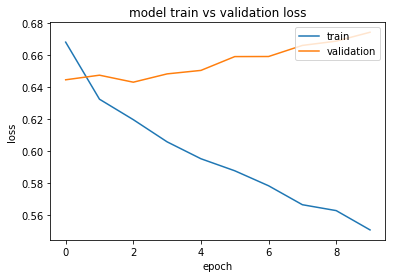

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

# create the model
embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='selu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# record training progress
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

# plot loss vs. epoch
# https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()